<a href="https://colab.research.google.com/github/Mary7Magdalene/Fungal-Back-acne/blob/main/back_acne_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
back_acne = pd.read_csv("/content/back acne.csv")
back_acne.head(2)

,ID,Age,Gender,Skin Type,Climate,Exercise Frequency,Sweating Level,Use of Tight Clothing,Skin Care Routine,Hygiene,Diet,Recent Medications,History of fungal infections,Stress Level,Fungal Back ance
0,1,23,Female,Oily,Hot-Humid,4-5-times,High,Yes,Minimal,no-exfoliation,High-sugar-intake,NaN,Yes,High,Yes
1,2,30,Male,Combination,Mild,2-3-times,Moderate,No,Regular,exfoliate-weekly,Balanced-Diet,Antibiotics for acne,No,Medium,No


In [4]:
#checking for missing values
back_acne.isnull().sum()

,0
ID,0
Age,0
Gender,0
Skin Type,0
Climate,0
Exercise Frequency,0
Sweating Level,0
Use of Tight Clothing,0
Skin Care Routine,0
Hygiene,0


In [5]:
#replacing all the null values in the "medication" column with "no_previous_medication"
back_acne.fillna("no-previous-medication",inplace = True)

In [6]:
#dropping the unnecessary columns
back_acne.drop("ID", axis = 1,inplace = True)

In [7]:
print(back_acne.columns)

Index(['Age', 'Gender', 'Skin Type', 'Climate', 'Exercise Frequency',
       'Sweating Level', 'Use of Tight Clothing', 'Skin Care Routine',
       ' Hygiene     ', 'Diet', 'Recent Medications',
       'History of fungal infections', 'Stress Level', 'Fungal Back ance'],
      dtype='object')


In [8]:
#encoding the categorical columns
encoder = LabelEncoder()
categorical_columns = [ 'Gender', 'Skin Type', 'Climate', 'Exercise Frequency',
       'Sweating Level', 'Use of Tight Clothing', 'Skin Care Routine',
       ' Hygiene     ', 'Diet', 'Recent Medications',
       'History of fungal infections', 'Stress Level', 'Fungal Back ance']

# For example, if the column is 'Hygiene Practice' instead of 'Hygiene Practices', change it in the list above
for columns in categorical_columns:
  back_acne[columns]= encoder.fit_transform(back_acne[columns])

#normalizing the continious variables
back_acne['Age']=back_acne[['Age']].apply(lambda x: (x-x.min())/(x.max()- (x.min())))

#display the preprocessed data
back_acne.head(3)


,Age,Gender,Skin Type,Climate,Exercise Frequency,Sweating Level,Use of Tight Clothing,Skin Care Routine,Hygiene,Diet,Recent Medications,History of fungal infections,Stress Level,Fungal Back ance
0,0.083333,0,3,1,3,0,1,2,4,4,2,1,0,1
1,0.666667,1,0,2,1,2,0,3,0,0,0,0,2,0
2,0.416667,0,1,0,0,1,0,0,6,6,2,0,1,0


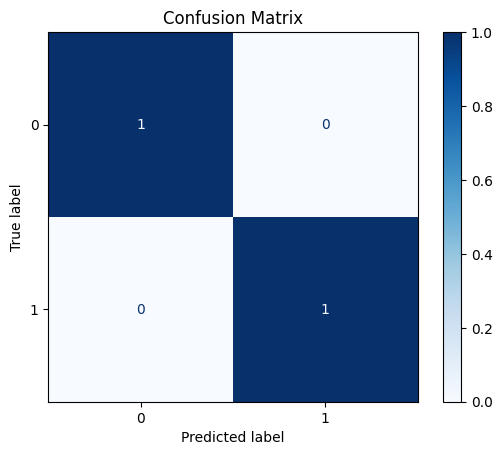

In [15]:
#bulding a confusion matrix
cm = confusion_matrix(y_test, y_pred)
#create a confusion matrix display
dist = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0,1])
dist.plot(cmap =plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


A heatmap helps in understanding the correlation between various factors and their weight of their contribution to the development of the fungal back acne

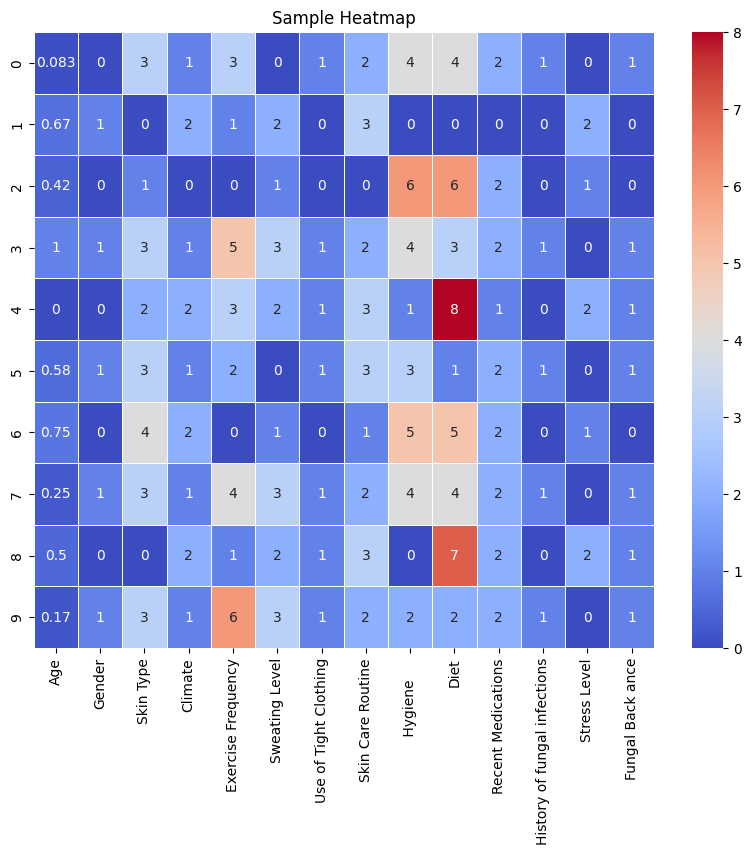

In [17]:
plt.figure(figsize=(10, 8))

# Step 4: Create the heatmap
sns.heatmap(back_acne, annot=True, cmap='coolwarm', linewidths=.5)

# Step 5: Show the plot
plt.title('Sample Heatmap')
plt.show()


Conclusions from the heat map
1. Identifying Strong Correlations
The darker red areas represent higher positive correlations (closer to 1).

The darker blue areas represent negative correlations (closer to -1 or 0).

The light blue to white shades indicate weaker correlations.

2. Key Observations from the Heatmap
Sweating Level & Fungal Back Acne:

The value in this cell appears relatively higher, meaning increased sweating may contribute significantly to the occurrence of fungal back acne.

Diet & Fungal Back Acne:

A strong red zone in the "Diet" row suggests that diet has a notable influence.

Poor diet might be exacerbating fungal back acne, possibly due to increased sugar or high glycemic foods affecting skin health.

Use of Tight Clothing & Fungal Back Acne:

Some correlation is visible, suggesting that tight clothing (which traps sweat and heat) may play a role in increasing fungal acne risk.

History of Fungal Infections & Fungal Back Acne:

If there's a notable correlation here, it suggests that individuals with a history of fungal infections are more prone to recurring back acne issues.

Hygiene & Fungal Back Acne:

If the value is lower or near zero, it may indicate hygiene alone is not a primary driver but rather a contributing factor.

3. Additional Insights
Exercise Frequency & Sweating Level:

If exercise frequency correlates highly with sweating level, but sweating level correlates with fungal acne, it implies exercise-induced sweating could be a risk factor.

Stress & Fungal Back Acne:

If stress shows a correlation, it could indicate that stress-induced hormone fluctuations play a role in acne occurrence.

In [9]:
#extracting labels and features from tha dataset
X = back_acne.drop('Fungal Back ance', axis = 1)
y = back_acne['Fungal Back ance']
scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X)
print(y)

[[-1.18308799 -1.          0.60302269 -0.46852129  0.2548236  -1.54545455
   0.65465367 -0.10599979  0.55772214  0.          0.46852129  1.
  -0.91766294]
 [ 0.7428692   1.         -1.6583124   1.09321633 -0.76447079  0.27272727
  -1.52752523  0.95399809 -1.47035837 -1.63299316 -2.65495395 -1.
   1.3764944 ]
 [-0.08254102 -1.         -0.90453403 -2.0302589  -1.27411798 -0.63636364
  -1.52752523 -2.22599555  1.57176239  0.81649658  0.46852129 -1.
   0.22941573]
 [ 1.84341618  1.          0.60302269 -0.46852129  1.27411798  1.18181818
   0.65465367 -0.10599979  0.55772214 -0.40824829  0.46852129  1.
  -0.91766294]
 [-1.45822474 -1.         -0.15075567  1.09321633  0.2548236   0.27272727
   0.65465367  0.95399809 -0.96333824  1.63299316 -1.09321633 -1.
   1.3764944 ]
 [ 0.46773246  1.          0.60302269 -0.46852129 -0.2548236  -1.54545455
   0.65465367  0.95399809  0.05070201 -1.22474487  0.46852129  1.
  -0.91766294]
 [ 1.01800595 -1.          1.35680105  1.09321633 -1.27411798 -0.63636

In [10]:
#splitting the data into training and test data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [11]:
#fitting the model to the training data
model = RandomForestClassifier(n_estimators =50, random_state = 42)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [19]:
#classificarion report
#precision
#recall
#f1-score
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [12]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

1.0


In [13]:
#making predictions based on first data
input_data =X[0,:]
input_data_reshaped = input_data.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)


[1]


In [14]:
if prediction == 1:
  print("The patient has Fungal Back Acne")
else:
  print("The patient does not have Fungal Back Acne")

The patient has Fungal Back Acne
